In [9]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram

In [2]:
# Half adder
# input qubits: a, b
# output qubits: s (sum) and cout (carry-out)
def halfadd(circ, a, b, s, cout) :
    circ.cx(a, s)
    circ.cx(b, s)
    circ.ccx(a, b, cout)

In [3]:
# Full adder
# input qubits: a, b, cin(sum)
# output qubits: sum(cin) and cout (carry-out)
# Clearify: I am using the same qubit for both cin and sum
def fulladd(circ, a, b, s, cout) :
    circ.ccx(a, b, cout)
    circ.cx(a, b)
    circ.ccx(b, s, cout)
    circ.cx(b, s)
    circ.cx(a, b)

In [4]:
#nbit adder；
n = 4
# Create registers and circuit
a = QuantumRegister(n, 'a')  # input
b = QuantumRegister(n, 'b')
s = QuantumRegister(n + 1, 'cin/s')  # output
qc = QuantumCircuit(a, b, s)

In [5]:
# All combinations of input
for i in range(0, n):  
    qc.h(a[i])
for j in range(0, n):  
    qc.h(b[j])
qc.barrier()
# Build adder circuit
halfadd(qc, a[0], b[0], s[0], s[1])
for k in range(1, n):
    fulladd(qc, a[k], b[k], s[k], s[k + 1])
qc.barrier()
# Measure the sum
m = ClassicalRegister(n + 1, 'sum')
qc.add_register(m)
qc.measure(s,m)

In [6]:
# Simulate and show results
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=4096)  # shots default = 1024
result = job.result()
print(result.get_counts())

{'10101': 179, '00101': 82, '10000': 237, '10110': 159, '10100': 164, '10111': 122, '11100': 47, '11101': 37, '01001': 142, '11010': 67, '01010': 179, '11001': 91, '00000': 16, '00100': 88, '01110': 249, '00110': 127, '00010': 36, '11011': 64, '01011': 186, '10001': 219, '01111': 267, '00011': 64, '11000': 117, '01000': 147, '01100': 233, '01101': 205, '00111': 132, '10011': 195, '11110': 21, '00001': 31, '10010': 193}


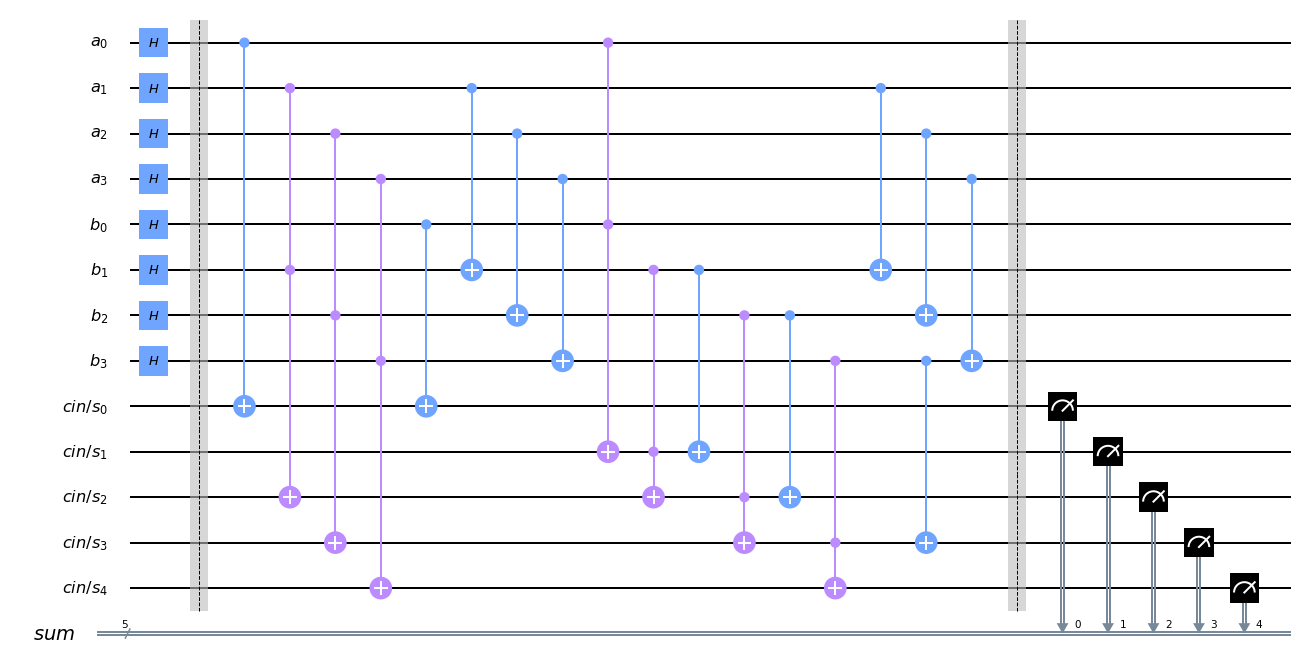

In [7]:
qc.draw(output='mpl')

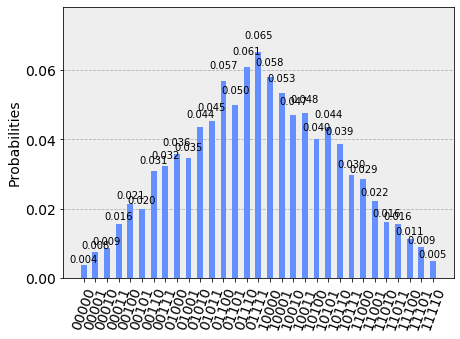

In [8]:
plot_histogram(result.get_counts())